In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
def plotar_imagem(imagem, titulo=None):
    plt.figure(figsize=(2.5,2.5))
    plt.imshow(imagem)
    if titulo:
        plt.title(titulo)
    plt.show()

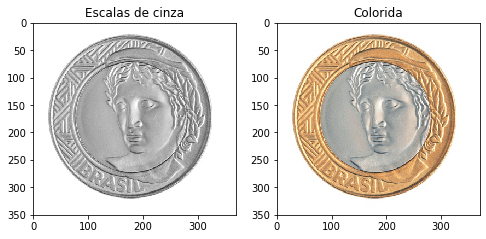

In [3]:
#preto e branco
gray = cv2.imread('C:\\Users\\giova\\Desktop\\TCC\\img\\1.jpg',0)
#colorida
color = cv2.imread('C:\\Users\\giova\\Desktop\\TCC\\img\\1.jpg',1)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.title('Escalas de cinza')
    
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(color, cv2.COLOR_BGR2RGB))
plt.title('Colorida')
    
plt.show()

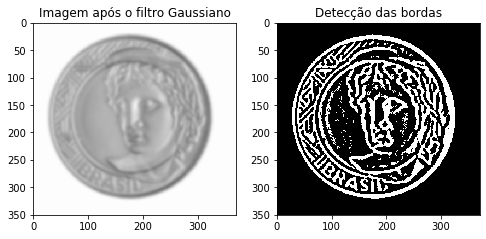

In [4]:
#Tratando imperfeições na imagem preto e branco (a que será usada para a identificação dos circulos)
gray_blur = cv2.GaussianBlur(gray, (15,15), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 1s1,1)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(gray_blur, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem após o filtro Gaussiano')
    
plt.subplot(1,2,2)
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.title('Detecção das bordas')
    
plt.show()

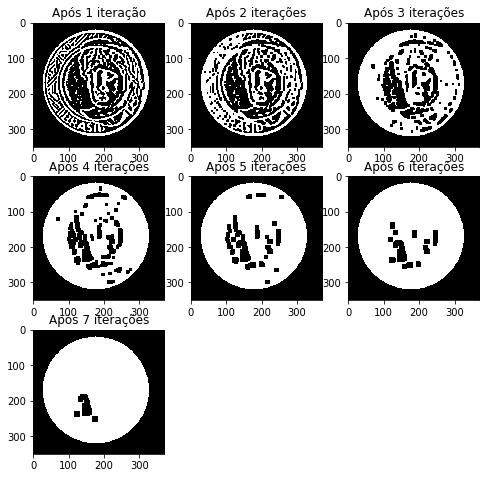

In [5]:
#Utilizando o metódo de fechamento a partir de transformações morfológicas, através de um processo iterativo que é mostrado passo a passo
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)
plt.figure(figsize=(8,8))
plt.subplot(3,3,1)
plt.imshow(closing, cmap='gray', vmin=0, vmax=255)
plt.title('Após 1 iteração')
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
plt.subplot(3,3,2)
plt.imshow(closing, cmap='gray', vmin=0, vmax=255)
plt.title('Após 2 iterações')
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)
plt.subplot(3,3,3)
plt.imshow(closing, cmap='gray', vmin=0, vmax=255)
plt.title('Após 3 iterações')
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)
plt.subplot(3,3,4)
plt.imshow(closing, cmap='gray', vmin=0, vmax=255)
plt.title('Após 4 iterações')
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)
plt.subplot(3,3,5)
plt.imshow(closing, cmap='gray', vmin=0, vmax=255)
plt.title('Após 5 iterações')
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=6)
plt.subplot(3,3,6)
plt.imshow(closing, cmap='gray', vmin=0, vmax=255)
plt.title('Após 6 iterações') 
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=7)
plt.subplot(3,3,7)
plt.imshow(closing, cmap='gray', vmin=0, vmax=255)
plt.title('Após 7 iterações')
plt.show()

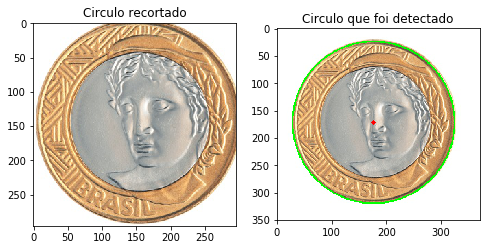

In [6]:
#Encontrando os círculos da imagem
circles = cv2.HoughCircles(closing,cv2.HOUGH_GRADIENT,1, 150, 300 , 50 , 15, 0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
        colorc = np.copy(color)
        mask = np.full((i[2],i[2],3), 255)
        mask = colorc[i[0]-i[2]:i[0]+i[2], i[1]-i[2]:i[1]+i[2]]
        plt.figure(figsize=(8,8))
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
        plt.title('Circulo recortado')
        # desenhando a borda do circulo detectado
        cv2.circle(color,(i[0],i[1]),i[2],(0,255,0),2)
        #desenha o centro do circulo detectado
        cv2.circle(color,(i[0],i[1]),2,(0,0,255),3)
        plt.subplot(1,2,2)
        plt.imshow(cv2.cvtColor(color, cv2.COLOR_BGR2RGB))
        plt.title('Circulo que foi detectado')
        
        plt.show()